## T-Tests
- Used on two samples data sets that are numeric
    - if you have more than two data sets, then you must either do it a) pairwise T-tests, or something else (e.g. Anova)

A T-test does two things:
1. How **different** two means values (obtained from two sets of distributed data) are - T value
    - Samller values indicate less differences
    
2. How **significant** are these differences (i.e. did they occur randomly/by chance) - P value
    - Smaller values indicate that they were not random (i.e. P=0.05 means there is a 5% probability that the results happened by chance).


Random, Gaussian (i.e. normal) distributin of data points
- random.normal: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    - creates a Gaussian distribution with a curve width based on a standard deviation value

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Three data sets - with means at 0.0 and 2.0, and standard deviations of 1.0 and 0.5
data1 = np.random.normal(0.0, 1.0, size=50)
data2 = np.random.normal(0.0, 0.5, size=50)
data3 = np.random.normal(2.0, 1.0, size=50)

Note: std = 0, would provide perfect resulting means of either 0.0 and 2.0.

So, let's check what the means actually are (i.e. the effect of the std. dev.)

In [3]:
np.mean(data1)

-0.04720488866718213

In [4]:
np.mean(data2)

0.050445089826822

In [5]:
np.mean(data3)

2.2669483464811946

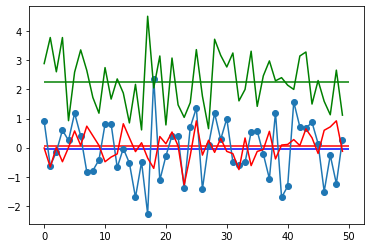

In [6]:
plt.plot()
plt.plot(data1, '-o')
plt.plot(data2, '-r')
plt.plot(data3, '-g')

plt.hlines(np.mean(data1), 0, 50, colors='blue')
plt.hlines(np.mean(data2), 0, 50, colors='red')
plt.hlines(np.mean(data3), 0, 50, colors='green')

plt.show()

Use seaborn to easily plot the histogram of the data

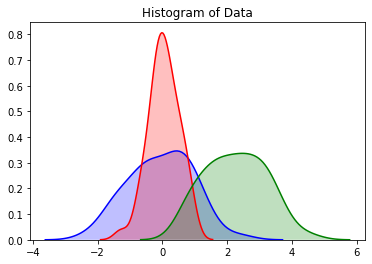

In [7]:
import seaborn as sns

plt.plot()
sns.kdeplot(data1, color='blue', shade=True)
sns.kdeplot(data2, color='red', shade=True)
sns.kdeplot(data3, color='green', shade=True)
plt.title("Histogram of Data")
plt.show()

#### t-test
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

- "The test measures **whether the mean (expected) value differs significantly across samples**."

- A **large p-value** (e.g. **0.05, 0.1**), then it is likely that the averages are not distinguishable."

- "If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages."

In [8]:
t_stat, p_value = stats.ttest_ind(data1, data3, equal_var = False)

In [9]:
t_stat

-11.984878262865541

In [10]:
p_value

6.699513124401666e-21

---
#### Real-world example

Research task: Investigate the height, weight, gender and age of a population of people (e.g. Germans)
- We can't investigate the full population, so we must sample a random subset of people

In [11]:
len(np.random.random_sample((50,)))

50

In [12]:
import pandas as pd

np.random.seed(10)

height = np.random.uniform(0.5, 2.0, size=50)
weight = np.random.uniform(15.0, 90.0, size=50)
gender = np.random.choice(('Male', 'Female'), size=50, p=[0.4, 0.6]) ## With a 40:60 ratio of male:female
age = np.random.uniform(3.0, 80.0, size=50)

In [13]:
height

array([1.65698096, 0.53112792, 1.45047235, 1.62320582, 1.24776052,
       0.83719497, 0.7970943 , 1.64079607, 0.75366625, 0.63250972,
       1.52803973, 1.93009002, 0.5059224 , 1.2682884 , 1.71893144,
       1.4187891 , 1.58263298, 0.9378141 , 1.87666118, 1.57186368,
       1.31381655, 0.71325507, 1.06001114, 1.51120042, 1.16274976,
       1.15102099, 1.42665047, 1.26970736, 1.47559577, 1.40155843,
       1.7078348 , 1.28247073, 1.86297332, 0.97885413, 0.63568902,
       0.95105008, 0.67097654, 1.74302199, 0.57034448, 1.43943072,
       1.32137923, 1.72893049, 0.79842131, 1.78527545, 1.02747896,
       1.63197154, 0.94394256, 1.82590472, 0.98826746, 0.74752385])

In [14]:
np.array([height, weight, gender, age])

array([['1.656980964900119', '0.5311279240391023', '1.4504723523894132',
        '1.623205823807918', '1.2477605184538856', '0.8371949682962715',
        '0.7970942971394359', '1.6407960682984382', '0.7536662548438031',
        '0.6325097212610153', '1.528039727551696', '1.9300900192924049',
        '0.5059223994918717', '1.268288395078665', '1.7189314424781703',
        '1.4187891002440822', '1.5826329761476994', '0.9378141022559497',
        '1.8766611837694152', '1.5718636750965358', '1.3138165520168918',
        '0.7132550714022905', '1.0600111400772039', '1.511200422599518',
        '1.1627497616344942', '1.1510209899999406', '1.4266504677039757',
        '1.2697073638315863', '1.475595772897201', '1.4015584301068165',
        '1.7078347952491197', '1.282470728590451', '1.8629733212130024',
        '0.9788541334828179', '0.6356890239063611', '0.9510500849543051',
        '0.6709765427953247', '1.743021989461515', '0.5703444790838746',
        '1.4394307224670888', '1.3213792338788

Create a dataframe that contains the information of our variables.
- 1 catagorical type data: gender
- 3 numeric type data: height, weight and age

In [15]:
df = pd.DataFrame(list(zip(height, weight, gender, age)), columns=['height (m)', 'weight (kg)', 'gender', 'age'])

In [16]:
df

,height (m),weight (kg),gender,age
0,1.656981,44.439693,Female,36.849603
1,0.531128,22.009528,Female,15.797565
2,1.450472,76.582924,Male,42.037354
3,1.623206,26.336401,Female,66.065762
4,1.247761,43.808584,Female,9.938219
5,0.837195,85.819553,Female,64.605294
6,0.797094,89.071911,Female,46.514729
7,1.640796,49.222841,Male,48.379774
8,0.753666,76.959213,Male,18.253751
9,0.632510,33.853060,Female,36.581106


In [17]:
df[df["gender"] == "Male"].count()

height (m)     21
weight (kg)    21
gender         21
age            21
dtype: int64

In [18]:
df[df["gender"] == "Female"].count()

height (m)     29
weight (kg)    29
gender         29
age            29
dtype: int64

Now let's look at our random distribution and think about correlation between the data.

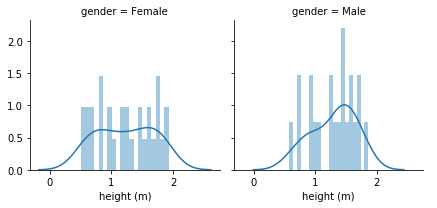

In [19]:
hist = sns.FacetGrid(df, col="gender")
hist.map(sns.distplot, "height (m)", bins=20)
hist.add_legend()

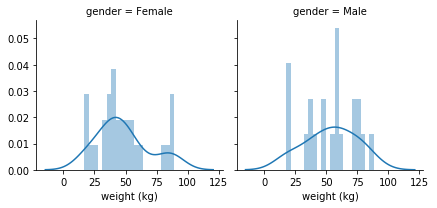

In [20]:
hist = sns.FacetGrid(df, col="gender")
hist.map(sns.distplot, "weight (kg)", bins=20)
hist.add_legend()

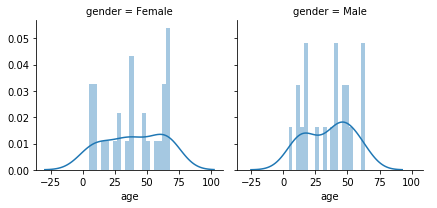

In [21]:
hist = sns.FacetGrid(df, col="gender")
hist.map(sns.distplot, "age", bins=20)
hist.add_legend()

Compute the mean and median as a function of the gender.
- use pandas groupby function

In [22]:
df.groupby(['gender']).mean()

,height (m),weight (kg),age
gender,,,
Female,1.223539,47.744836,39.407108
Male,1.293072,53.507534,35.496592


In [23]:
df.groupby(['gender']).median()

,height (m),weight (kg),age
gender,,,
Female,1.247761,43.808584,38.165710
Male,1.401558,56.818364,40.269609


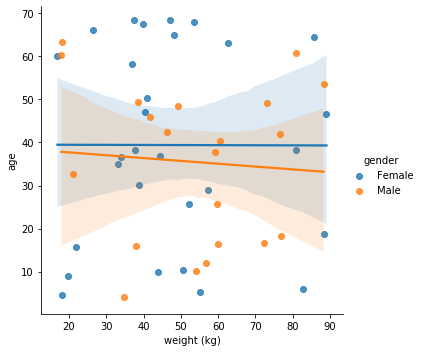

In [24]:
sns.lmplot(x='weight (kg)', y='age', data=df, hue='gender', fit_reg=True, legend=True)
plt.show()

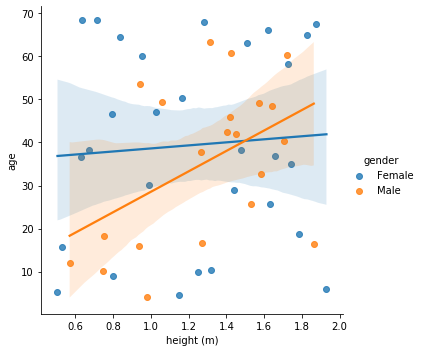

In [25]:
sns.lmplot(x='height (m)', y='age', data=df, hue='gender', fit_reg=True, legend=True)
plt.show()

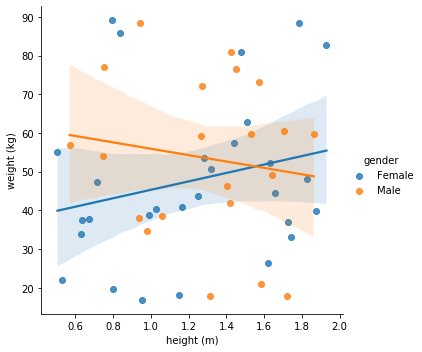

In [26]:
sns.lmplot(x='height (m)', y='weight (kg)', data=df, hue='gender', fit_reg=True, legend=True)
plt.show()

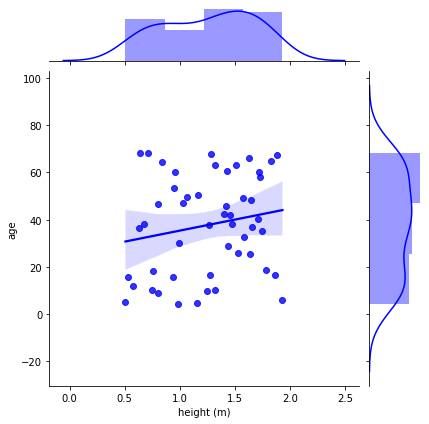

In [27]:
sns.jointplot(x='height (m)', y='age', data=df, kind='reg', color='b')
plt.show()

####
Research Question: Is there a difference between the number of mean and women in the population?
- Hypothesis Zero (aka Null Hypotheis): there is no difference
- Hypothesis One: there is a difference

In other words - is our sampling of the real population artifically skewed, or is it likely to be real?

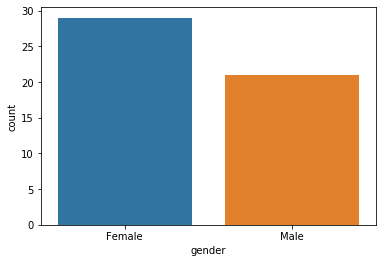

In [28]:
sns.countplot(x="gender", data=df)

We must first determine a threshold for how low our statisical result is for use to have confidence that the Null Hypothesis is wrong - i.e. the probability value (P-value) that the Null Hypothesis is wrong.

Common convention is 5%

One-Sample Proportion Test

In [29]:
from scipy import stats

test = np.array([60,40])
stats.zscore(test)


array([ 1., -1.])

In [30]:
df.groupby('gender')['age'].transform(stats.zscore)

0    -0.114799
1    -1.059767
2     0.363270
3     1.196633
4    -1.322776
5     1.131076
6     0.319041
7     0.715525
8    -0.957658
9    -0.126851
10   -0.539399
11   -1.504403
12   -1.528157
13    0.132878
14    1.380597
15    0.578452
16   -0.157890
17   -1.086073
18    1.263082
19    0.757025
20    1.542467
21    1.298502
22    0.774607
23    1.065378
24    0.493967
25   -1.561060
26    1.404548
27   -1.051992
28   -0.049444
29    0.389546
30    0.265091
31    1.284250
32   -1.057245
33   -1.742257
34    1.299383
35    0.932704
36   -0.055723
37   -0.193281
38   -1.305645
39   -0.463632
40   -1.307042
41    0.839924
42   -1.367782
43   -0.922385
44    0.348938
45   -0.618639
46    0.999398
47    1.143172
48   -0.420309
49   -1.405242
Name: age, dtype: float64

In [31]:
x = (df.groupby('gender')['age'])

In [32]:
for i in x:
    print(i)

('Female', 0     36.849603
1     15.797565
3     66.065762
4      9.938219
5     64.605294
6     46.514729
9     36.581106
11     5.891941
12     5.362733
18    67.546122
21    68.335207
23    63.141668
24    50.411739
25     4.629720
28    38.305594
31    68.017706
34    68.354834
35    60.185942
36    38.165710
37    35.101177
39    29.078293
40    10.288746
41    58.118977
42     8.935576
43    18.858170
44    47.180770
45    25.625030
47    64.874763
48    30.043440
Name: age, dtype: float64)
('Male', 2     42.037354
7     48.379774
8     18.253751
10    25.784590
13    37.889085
14    60.354534
15    45.911746
16    32.653747
17    15.941605
19    49.126988
20    63.269041
22    49.443549
26    60.785775
27    16.555244
29    42.510448
30    40.269609
32    16.460670
33     4.126885
38    11.988172
46    53.490959
49    10.194909
Name: age, dtype: float64)
